<AxesSubplot:title={'center':'Rolling 20-day Minimum of the Facebook Closing Price'}, xlabel='date'>

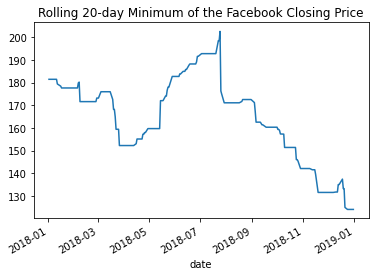

In [1]:
#1
#Plot the rolling 20-day minimum of the Facebook closing price using pandas..

%matplotlib inline
import matplotlib.pyplot as plot
import numpy
import pandas

facebook =pandas.read_csv('Ch5 data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

facebook.close.rolling('20D').min().plot(title='Rolling 20-day Minimum of the Facebook Closing Price')


<AxesSubplot:title={'center':'Facebook change from open to close in the price of Facebook stock'}, ylabel='Density'>

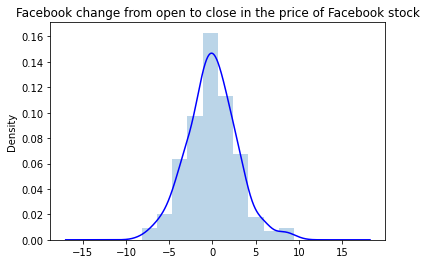

In [2]:
#1
#Create a histogram and KDE of the change from open to close in the price of Facebook stock.

diff =facebook.open - facebook.close
ax = diff.plot(kind='hist', density=True, alpha=0.3)
diff.plot(
    kind='kde', color='blue', ax=ax, 
    title='Facebook change from open to close in the price of Facebook stock'
)

mb            AxesSubplot(0.1,0.15;0.173913x0.75)
ms_20    AxesSubplot(0.308696,0.15;0.173913x0.75)
mwr      AxesSubplot(0.517391,0.15;0.173913x0.75)
mww      AxesSubplot(0.726087,0.15;0.173913x0.75)
dtype: object

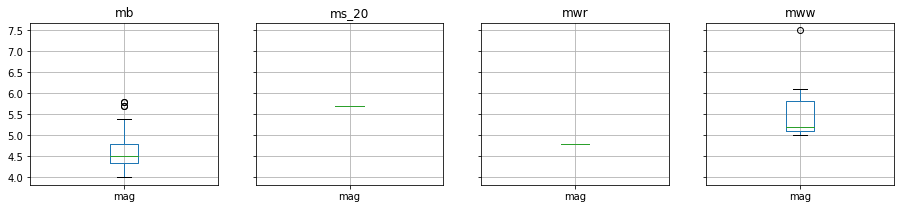

In [16]:
#3
#Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.
earthquakes = pandas.read_csv('Ch5 data/earthquakes.csv')

earthquakes.query('parsed_place == "Indonesia"')[['mag', 'magType']].groupby('magType').boxplot(layout=(1, 4), figsize=(15, 3))

<AxesSubplot:title={'center':'Difference between Weekly Maximum \nHigh Price and Minimum Low Price of Facebook'}, xlabel='date'>

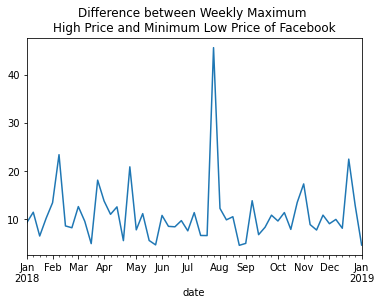

In [18]:
#4
#Make a line plot of the difference between the weekly maximum high price and the weekly
#minimum low price for Facebook. This should be a single line.

facebook.resample('1W').agg(dict(high='max', low='min')
).assign(max_change_weekly=lambda x: x.high - x.low
).max_change_weekly.plot(title='Difference between Weekly Maximum \nHigh Price and Minimum Low Price of Facebook')


<AxesSubplot:xlabel='date'>

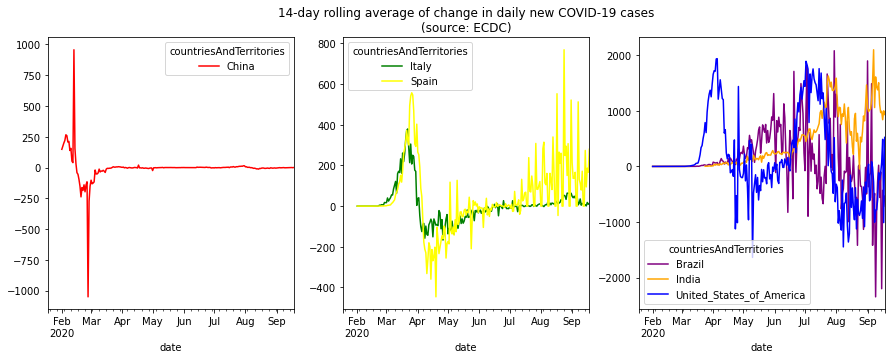

In [32]:
#5 
#Plot the 14-day moving average of the daily change in new COVID-19 cases in Brazil, China, India, Italy, Spain, and the USA:
#A
#First, use the diff() method to calculate the day-over-day change in new cases. 
#Then, use rolling() to calculate the 14-day moving average

covidData = pandas.read_csv('ch5 data/covid19_cases.csv').assign(date=lambda x: pandas.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').sort_index()['2020-01-18':'2020-09-18']


rollingCases = covidData.pivot_table(
    index=covidData.index, columns=['countriesAndTerritories'], values='cases'
).apply(lambda x: x.diff().rolling(14).mean())


#b
#Make three subplots: one for China; one for Spain and Italy; and one for Brazil, India, and the USA.
fig, axes = plot.subplots(1, 3, figsize=(15, 5))

rollingCases[['China']].plot(ax=axes[0], color='red')
rollingCases[['Italy', 'Spain']].plot(
    ax=axes[1], color=['green', 'yellow'],
    title='14-day rolling average of change in daily new COVID-19 cases\n(source: ECDC)'
)
rollingCases[['Brazil', 'India', 'United_States_of_America']].plot(ax=axes[2], color=['purple', 'orange','blue'])


<AxesSubplot:title={'center':'monthly effect of after-hours '}, xlabel='date'>

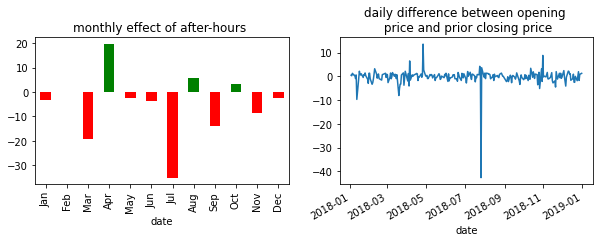

In [50]:
#6
#Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours 
#trading has had on Facebook's stock prices:



data = (facebook.open - facebook.close.shift())
monthly_data = data.resample('1M').sum()

fig, axes = plot.subplots(1, 2, figsize=(10, 3))

data.plot(
    ax=axes[1],
    title='daily difference between opening \n price and prior closing price'
)

monthly_data.index = monthly_data.index.strftime('%b')
monthly_data.plot(
    ax=axes[0],
    kind='bar', 
    title='monthly effect of after-hours ',
    color=numpy.where(monthly_effect >= 0, 'green', 'red'),
)